### Polar TimeSeries Animation - PurpleAir Data

see following links:
https://www.climate-lab-book.ac.uk/spirals/  
http://blogs.reading.ac.uk/climate-lab-book/files/2016/06/spiral_2017_large-1.gif

try as doy daily averages (not monthly averages)

Adapted from Ed Hawkins at Climate Lab Book.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean

In [16]:
dfo = pd.read_csv('Data/Moonflower Farm Primary RealTime.csv',parse_dates=True,index_col='created_at')

In [17]:
dfo.sample()

,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
created_at,,,,,,,,,,
2020-12-15 09:50:56+00:00,38252,1.4,3.0,4.53,4714.0,-79.0,48.0,61.0,3.0,NaN


<ipython-input-113-68b9faf03050>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep','Oct', 'Nov','Dec'])
<ipython-input-113-68b9faf03050>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['','','','2 Deg C','','',''])


[Text(0, 2.0, ''),
 Text(0, 4.0, ''),
 Text(0, 6.0, ''),
 Text(0, 8.0, '2 Deg C'),
 Text(0, 10.0, ''),
 Text(0, 12.0, ''),
 Text(0, 14.0, ''),
 Text(0, 16.0, '')]

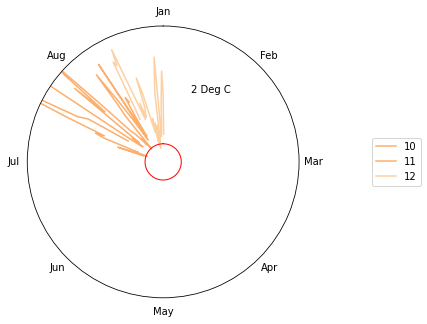

In [113]:
df = dfo.resample('1D').mean()
dfg = df.groupby(df.index.month)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='polar')

color_range = ['#fff5eb','#fff5eb','#fee6ce','#fee6ce','#fdd0a2',
               '#fdd0a2','#fdae6b','#fdae6b','#fd8d3c','#fd8d3c',
               '#f16913','#f16913','#d94801','#d94801','#a63603',
               '#a63603','#7f2704','#7f2704','#fff5eb','#fff5eb','#fee6ce','#fee6ce','#fdd0a2',
               '#fdd0a2','#fdae6b','#fdae6b','#fd8d3c','#fd8d3c',
               '#f16913','#f16913','#d94801','#d94801','#a63603',
               '#a63603','#7f2704','#7f2704','#fff5eb','#fff5eb','#fee6ce','#fee6ce','#fdd0a2',
               '#fdd0a2','#fdae6b','#fdae6b','#fd8d3c','#fd8d3c',
               '#f16913','#f16913','#d94801','#d94801','#a63603',
               '#a63603','#7f2704','#7f2704',]
color_range = color_range[::-1]
for year in dfg.groups:
    ax.plot(np.deg2rad((dfg.get_group(year).index.dayofyear/365*360)),
              dfg.get_group(year)['PM2.5_ATM_ug/m3'],color=color_range[year],label=year)
#doy_ticks = np.deg2rad(((np.array([1,32,60,91,121,152,182,213,244,274,305,335]))/365*360))

ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
ax.plot(np.deg2rad(np.arange(0,360,1)),np.arange(0,360,1)*0+2,linewidth=1,color='r')
ax.set_ylim([0,15])
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N', offset=0)
plt.grid(False,which='both')
#ax.set_xticks(doy_ticks)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep','Oct', 'Nov','Dec'])
ax.set_yticklabels(['','','','2 Deg C','','',''])

Text(0.5, 0, 'Time (UTC)')

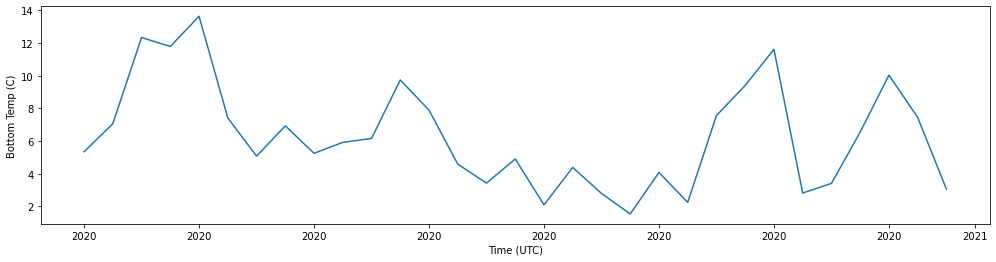

In [23]:
fig, ax = plt.subplots(figsize=(17, 4))
cs = plt.plot(dfg.get_group(year)['PM2.5_ATM_ug/m3'])

xfmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(xfmt)

ax.set_ylabel('Bottom Temp (C)')
ax.set_xlabel('Time (UTC)')
#ax.set_title('M8')
#ax.set_xlim(['2017-07-01','2017-08-01'])

In [103]:
dfg.groups

{1: [2020-12-01 00:00:00+00:00], 2: [2020-12-02 00:00:00+00:00], 3: [2020-12-03 00:00:00+00:00], 4: [2020-12-04 00:00:00+00:00], 5: [2020-12-05 00:00:00+00:00], 6: [2020-12-06 00:00:00+00:00], 7: [2020-12-07 00:00:00+00:00], 8: [2020-12-08 00:00:00+00:00], 9: [2020-12-09 00:00:00+00:00], 10: [2020-12-10 00:00:00+00:00], 11: [2020-12-11 00:00:00+00:00], 12: [2020-12-12 00:00:00+00:00], 13: [2020-12-13 00:00:00+00:00], 14: [2020-12-14 00:00:00+00:00], 15: [2020-12-15 00:00:00+00:00], 16: [2020-12-16 00:00:00+00:00], 17: [2020-12-17 00:00:00+00:00], 18: [2020-12-18 00:00:00+00:00], 19: [2020-12-19 00:00:00+00:00], 20: [2020-12-20 00:00:00+00:00], 21: [2020-12-21 00:00:00+00:00], 22: [2020-12-22 00:00:00+00:00], 23: [2020-12-23 00:00:00+00:00], 24: [2020-12-24 00:00:00+00:00], 25: [2020-12-25 00:00:00+00:00], 26: [2020-12-26 00:00:00+00:00], 27: [2020-12-27 00:00:00+00:00], 28: [2020-12-28 00:00:00+00:00], 29: [2020-12-29 00:00:00+00:00], 30: [2020-12-30 00:00:00+00:00], 31: [2020-12-31 00